 # Problem 1

In [1]:
import numpy as np
from pyDOE import *
import matplotlib.pyplot as plt
from numpy.linalg import *

# Generating samples 
def generate_sample(N):
    x = 2*lhs(1,N)     # Latin hypercube sampling
    x = x.flatten()
    x.sort()
    x = x[:,None]
    y = np.exp(x) * np.sin(2*np.pi*x) + 0.5*np.random.randn(N,1) 
    return x, y

In [217]:
class BayesLR:
    '''A class that holds parameter prior/posterior/MLE for Bayesian Linear Regression.'''
    
    def __init__(self, x, y, alpha = 5, beta = 0.1 ):
        self.alpha = alpha
        self.beta = beta
        self.x = x
        self.y = y
        self.j = 1e-8
        
    def MLE(self):
        X_TX = np.dot(self.x.T, self.x)
        X_TY = np.dot(self.x.T, self.y)
        Inv = inv(X_TX++self.j)
        self.MLE = np.dot(Inv, X_TY)
        return self.MLE

        
    def MAP(self):
        X_TX = np.dot(self.x.transpose(), self.x)
        X_TY = np.dot(self.x.transpose(), self.y)
        I = np.identity(self.x.shape[1])
        Lambda = self.alpha*X_TX + self.beta*I
        mean = np.dot(inv(X_TX + (self.beta/self.alpha)*I), X_TY)
        self.Lambda_inv = inv(Lambda)
        self.MAP = mean
        return self.MAP,self.Lambda_inv
        
    def PREDICT(self, x_star):
        mean_star = np.matmul(x_star, self.MAP)
        var_star = 1.0/self.alpha + np.matmul(x_star, np.matmul(self.Lambda_inv, x_star.T))
        return mean_star, var_star
    

In [218]:
# Define basis functions.
def iden_phi(x):
    return x
    
def mono_phi(x, M):
    N = x.shape[0]
    M = M+1
    phi_x = np.ones((N, M))
    for i in range(M):
        phi_x[:,i:i+1] = x**i
    return phi_x

def fourier_phi(x,M):
    N = x.shape[0]
    M = 2*M+2
    phi_x = np.ones((N, M))
    for i in range(M):
        if (i % 2 ==0):
            phi_x[:,i:i+1] = np.sin((i/2)*np.pi*x)
        else: 
            phi_x[:,i:i+1] = np.cos(((i-1)/2)*np.pi*x)
        
    return phi_x

def legendre_phi(x, M):
    N = x.shape[0]
    M = M+1
    phi_x = np.ones((N, M))
    for i in range(M):
        phi_x[:,i:i+1] = np.polynomial.legendre.Legendre.basis(i, [0,2])(x)
    return phi_x

In [219]:
N = 500
M = 8
alpha = 5
beta = 0.1

# Generate samples
x, y = generate_sample(N)

# (1). Identity basis

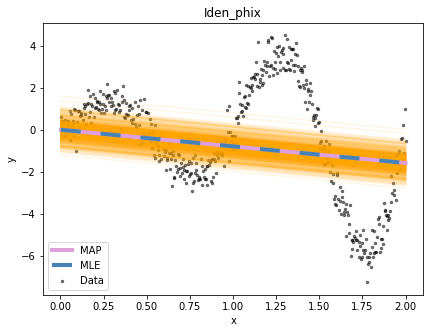

In [220]:
# Generate phi
iden_phix = iden_phi(x)

# Find MLE and MAP
BLR = BayesLR(iden_phix, y, alpha, beta)
w_iden_MLE = BLR.MLE()
w_iden_MAP, w_iden_Lambda_inv = BLR.MAP()

# Predict using MLE and MAP
y_star_MLE = np.dot(iden_phix, w_iden_MLE)
y_star_MAP = np.dot(iden_phix, w_iden_MAP)

# Plot
plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x.flatten(),y.flatten(),c='k', label = 'Data',s=6, alpha = 0.5)

num_predict = 500
mean_star_iden, var_star_iden = BLR.PREDICT(iden_phix)
predict_iden = np.random.multivariate_normal(mean_star_iden.flatten(), var_star_iden, num_predict)

for i in range(0, num_predict):
    plt.plot(x, predict_iden[i,:].T, 'orange', alpha=0.1, markersize = 0.1)
plt.plot(x.flatten(), y_star_MAP.flatten(), 'plum', linewidth=4.0, label = 'MAP')
plt.plot(x.flatten(), y_star_MLE.flatten(), 'steelblue', linewidth=4.0, label = 'MLE', linestyle = (0, (5, 5)))
plt.legend(loc = 'lower left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Iden_phix')

plt.show()


# (2). Monomial basis

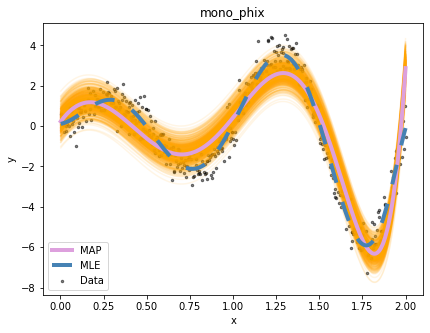

In [221]:

# Generate phi
mono_phix = mono_phi(x, M)

# Find MLE and MAP
BLR = BayesLR(mono_phix, y, alpha, beta)
w_mono_MLE = BLR.MLE()
w_mono_MAP, w_mono_Lambda_inv = BLR.MAP()

# Predict using MLE and MAP
y_star_MLE = np.dot(mono_phix, w_mono_MLE)
y_star_MAP = np.dot(mono_phix, w_mono_MAP)

# Plot
plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x.flatten(),y.flatten(),c='k', label = 'Data',s=6, alpha = 0.5)

num_predict = 500
mean_star_mono, var_star_mono = BLR.PREDICT(mono_phix)
predict_mono = np.random.multivariate_normal(mean_star_mono.flatten(), var_star_mono, num_predict)

for i in range(0, num_predict):
    plt.plot(x, predict_mono[i,:].T, 'orange', alpha=0.1, markersize = 0.05)
plt.plot(x.flatten(), y_star_MAP.flatten(), 'plum', linewidth=4.0, label = 'MAP')
plt.plot(x.flatten(), y_star_MLE.flatten(), 'steelblue', linewidth=4.0, label = 'MLE', linestyle = (0, (5, 5)))
plt.legend(loc = 'lower left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('mono_phix')

plt.show()

## (3). Fourier basis

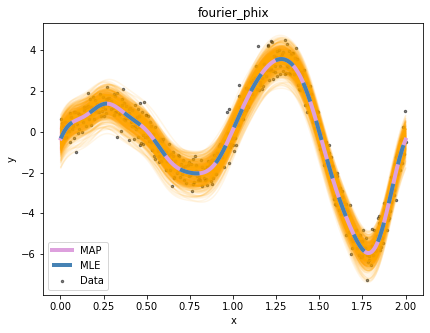

In [222]:
# Generate phi
fourier_phix = fourier_phi(x, M)

# Find MLE and MAP
BLR = BayesLR(fourier_phix, y, alpha, beta)
w_fourier_MLE = BLR.MLE()
w_fourier_MAP, w_fourier_Lambda_inv = BLR.MAP()

# Predict using MLE and MAP
y_star_MLE = np.dot(fourier_phix, w_fourier_MLE)
y_star_MAP = np.dot(fourier_phix, w_fourier_MAP)

# Plot
plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x.flatten(),y.flatten(),c='k', label = 'Data',s=6, alpha = 0.5)

num_predict = 500
mean_star_fourier, var_star_fourier = BLR.PREDICT(fourier_phix)
predict_fourier = np.random.multivariate_normal(mean_star_fourier.flatten(), var_star_fourier, num_predict)

for i in range(0, num_predict):
    plt.plot(x, predict_fourier[i,:].T, 'orange', alpha=0.1, markersize = 0.05)
plt.plot(x.flatten(), y_star_MAP.flatten(), 'plum', linewidth=4.0, label = 'MAP')
plt.plot(x.flatten(), y_star_MLE.flatten(), 'steelblue', linewidth=4.0, label = 'MLE', linestyle = (0, (5, 5)))
plt.legend(loc = 'lower left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('fourier_phix')

plt.show()

## (4). Legendre basis

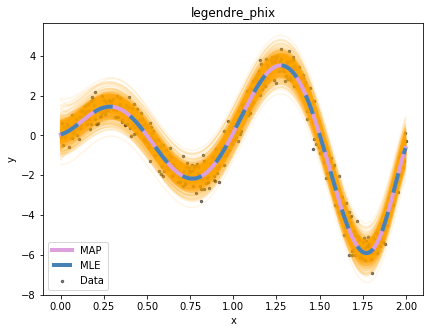

In [223]:
# Generate samples
x, y = generate_sample(N)

# Generate phi
legendre_phix = legendre_phi(x, M)

# Find MLE and MAP
BLR = BayesLR(legendre_phix, y, alpha, beta)
w_legendre_MLE = BLR.MLE()
w_legendre_MAP, w_legendre_Lambda_inv = BLR.MAP()

# Predict using MLE and MAP
y_star_MLE = np.dot(legendre_phix, w_legendre_MLE)
y_star_MAP = np.dot(legendre_phix, w_legendre_MAP)

# Plot
plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x.flatten(),y.flatten(),c='k', label = 'Data',s=6, alpha = 0.5)

num_predict = 500
mean_star_legendre, var_star_legendre = BLR.PREDICT(legendre_phix)
predict_legendre = np.random.multivariate_normal(mean_star_legendre.flatten(), var_star_legendre, num_predict)

for i in range(0, num_predict):
    plt.plot(x, predict_legendre[i,:].T, 'orange', alpha=0.1, markersize = 0.05)
plt.plot(x.flatten(), y_star_MAP.flatten(), 'plum', linewidth=4.0, label = 'MAP')
plt.plot(x.flatten(), y_star_MLE.flatten(), 'steelblue', linewidth=4.0, label = 'MLE', linestyle = (0, (5, 5)))
plt.legend(loc = 'lower left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('legendre_phix')

plt.show()

## Experiment with changing N and M and qualitative comments on the prediction accuracy.  Which set of features do you think works best for this data-set and why? Results and comments saved in the PDF file. Analysis is on page 5.

___Results and Discussion:___<br>
M: The fit is bad when M <= 2 since the data was only characterized by periodic function for 1 to 2 cycle. Increase dimension of basis can give us a better fitting result, but a too large M (for example, the M = 8, 10 result for Fourier basis) can result in overfitting.<br>
N: Increase the number of data points can reduce the uncertainty of Bayesian linear regression. It is clearly showed that the Bayesian linear regression of the 6000 data points are much more fused on the mean than 100 data points, and the # of lines outside of the standard deviation is much smaller. As we change number of data points from 100 to 6000, another influence is that as N increases, the difference between regression result of MLE and MAP will become smaller (as shown N change result for monomial basis). The reason is that when the number increases, the likelihood dominate and the effect of prior become smaller and smaller.<br>
___Which set of features do you think works best for this data-set and why?___<br>
Fourier basis works best for this data set since when we reduce M to 4, the regression result for the Fourier basis still fits the data well.

### Change M to 4, N still equals 500

In [224]:
M = 4

## (1) Change M doesn't affect the predition result of identity basis since it's irrelavent to M. 

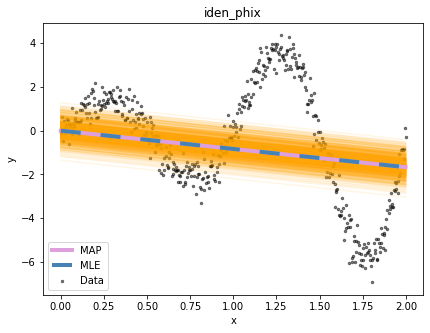

In [225]:
# Generate phi
iden_phix = iden_phi(x)

# Find MLE and MAP
BLR = BayesLR(iden_phix, y, alpha, beta)
w_iden_MLE = BLR.MLE()
w_iden_MAP, w_iden_Lambda_inv = BLR.MAP()

# Predict using MLE and MAP
y_star_MLE = np.dot(iden_phix, w_iden_MLE)
y_star_MAP = np.dot(iden_phix, w_iden_MAP)

# Plot
plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x.flatten(),y.flatten(),c='k', label = 'Data',s=6, alpha = 0.5)

num_predict = 500
mean_star_iden, var_star_iden = BLR.PREDICT(iden_phix)
predict_iden = np.random.multivariate_normal(mean_star_iden.flatten(), var_star_iden, num_predict)

for i in range(0, num_predict):
    plt.plot(x, predict_iden[i,:].T, 'orange', alpha=0.1, markersize = 0.05)
plt.plot(x.flatten(), y_star_MAP.flatten(), 'plum', linewidth=4.0, label = 'MAP')
plt.plot(x.flatten(), y_star_MLE.flatten(), 'steelblue', linewidth=4.0, label = 'MLE', linestyle = (0, (5, 5)))
plt.legend(loc = 'lower left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('iden_phix')

plt.show()

## (2). Monomial basis

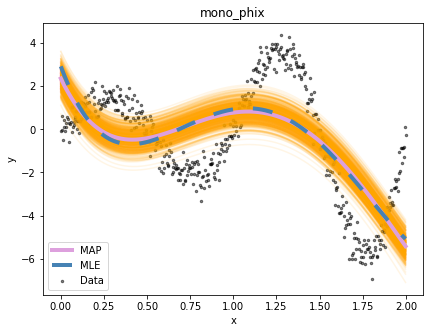

In [226]:
# Generate phi
mono_phix = mono_phi(x, M)

# Find MLE and MAP
BLR = BayesLR(mono_phix, y, alpha, beta)
w_mono_MLE = BLR.MLE()
w_mono_MAP, w_mono_Lambda_inv = BLR.MAP()

# Predict using MLE and MAP
y_star_MLE = np.dot(mono_phix, w_mono_MLE)
y_star_MAP = np.dot(mono_phix, w_mono_MAP)

# Plot
plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x.flatten(),y.flatten(),c='k', label = 'Data',s=6, alpha = 0.5)

num_predict = 500
mean_star_mono, var_star_mono = BLR.PREDICT(mono_phix)
predict_mono = np.random.multivariate_normal(mean_star_mono.flatten(), var_star_mono, num_predict)

for i in range(0, num_predict):
    plt.plot(x, predict_mono[i,:].T, 'orange', alpha=0.1, markersize = 0.05)
plt.plot(x.flatten(), y_star_MAP.flatten(), 'plum', linewidth=4.0, label = 'MAP')
plt.plot(x.flatten(), y_star_MLE.flatten(), 'steelblue', linewidth=4.0, label = 'MLE', linestyle = (0, (5, 5)))
plt.legend(loc = 'lower left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('mono_phix')

plt.show()

## (3). Fourier basis

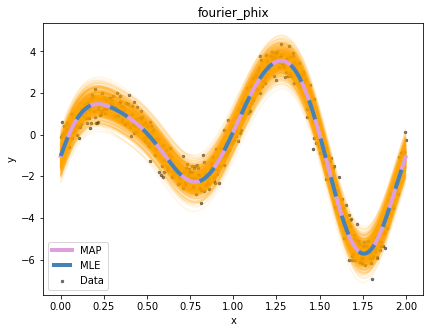

In [227]:
# Generate phi
fourier_phix = fourier_phi(x, M)

# Find MLE and MAP
BLR3 = BayesLR(fourier_phix, y, alpha, beta)
w_fourier_MLE = BLR3.MLE()
w_fourier_MAP, w_fourier_Lambda_inv = BLR3.MAP()

# Predict using MLE and MAP
y_star_MLE = np.dot(fourier_phix, w_fourier_MLE)
y_star_MAP = np.dot(fourier_phix, w_fourier_MAP)

# Plot
plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x.flatten(),y.flatten(),c='k', label = 'Data',s=6, alpha = 0.5)

num_predict = 500
mean_star_fourier, var_star_fourier = BLR3.PREDICT(fourier_phix)
predict_fourier = np.random.multivariate_normal(mean_star_fourier.flatten(), var_star_fourier, num_predict)

for i in range(0, num_predict):
    plt.plot(x, predict_fourier[i,:].T, 'orange', alpha=0.1, markersize = 0.05)
plt.plot(x.flatten(), y_star_MAP.flatten(), 'plum', linewidth=4.0, label = 'MAP')
plt.plot(x.flatten(), y_star_MLE.flatten(), 'steelblue', linewidth=4.0, label = 'MLE', linestyle = (0, (5, 5)))
plt.legend(loc = 'lower left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('fourier_phix')

plt.show()

## (4). Legendre basis

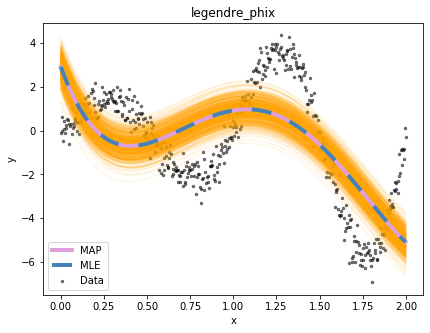

In [228]:
# Generate phi
legendre_phix = legendre_phi(x, M)

# Find MLE and MAP
BLR4 = BayesLR(legendre_phix, y, alpha, beta)
w_legendre_MLE = BLR4.MLE()
w_legendre_MAP, w_legendre_Lambda_inv = BLR4.MAP()

# Predict using MLE and MAP
y_star_MLE = np.dot(legendre_phix, w_legendre_MLE)
y_star_MAP = np.dot(legendre_phix, w_legendre_MAP)

# Plot
plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x.flatten(),y.flatten(),c='k', label = 'Data',s=6, alpha = 0.5)

num_predict = 500
mean_star_legendre, var_star_legendre = BLR4.PREDICT(legendre_phix)
predict_legendre = np.random.multivariate_normal(mean_star_legendre.flatten(), var_star_legendre, num_predict)

for i in range(0, num_predict):
    plt.plot(x, predict_legendre[i,:].T, 'orange', alpha=0.1, markersize = 0.05)
plt.plot(x.flatten(), y_star_MAP.flatten(), 'plum', linewidth=4.0, label = 'MAP')
plt.plot(x.flatten(), y_star_MLE.flatten(), 'steelblue', linewidth=4.0, label = 'MLE', linestyle = (0, (5, 5)))
plt.legend(loc = 'lower left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('legendre_phix')

plt.show()

# Problem 2 (1) (2) (5)

In [2]:
# Problem set up.
alpha_true = 5
beta_true = 1
sigma = 1
N = 1000
# Generating x and corresponding y
x = np.random.uniform(-1,1,N)
x.sort()
y = alpha_true*x + beta_true + np.random.normal(0, 1, N) #Generate y with noise

Final alpha and beta of gradient descent method [[4.94576647]
 [0.53030487]]
Final alpha and beta of Newton's method [[4.94219324]
 [0.99867234]]
Final alpha and beta of natural gradient descent method [[4.94942665]
 [1.21223072]]


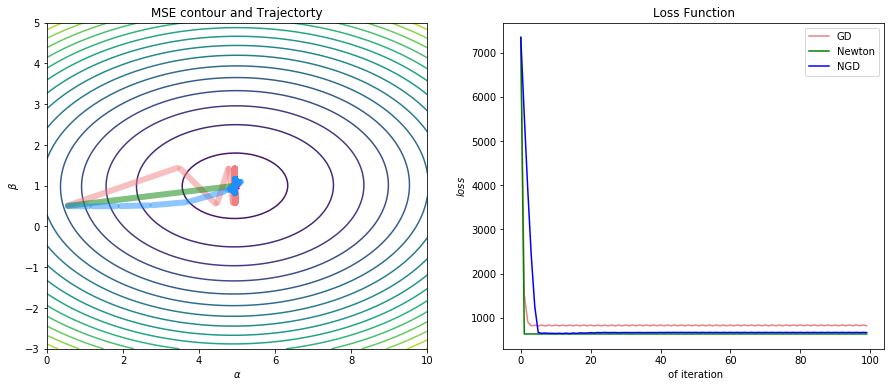

In [7]:
def MSE_func(beta, alpha):
    '''Mean square error function'''
    return np.average((y-(alpha*x + beta))**2)/2


def LOSS_func(ite, theta):
    '''Loss function'''
    loss = np.zeros((100,1))
    for i in range (100):
        a = theta[i][0]
        b = theta[i][1]
        loss[i] = np.sum((y-a*x-b)**2//(sigma**2))
    return loss
    
def compute_FIM(last_theta_fisher, N):
    '''Calculate FIM.'''
    FIM = np.zeros((2,2))
    a = last_theta_fisher[0]
    b = last_theta_fisher[1]
    FIM[0][0] = np.sum((a*x+b-y)**2*x**2)
    FIM[0][1] = np.sum((a*x+b-y)**2*x)
    FIM[1][0] = FIM[0][1]
    FIM[1][1] = np.sum((a*x+b-y)**2)
    return FIM/N/(sigma**2)

# Establish contour plot
plt.figure(1, figsize=(15,6))
plt.subplot(1,2,1)
beta_grid = np.linspace(-3,5,100)
alpha_grid = np.linspace(0,10,100)
J_grid = np.ones((100,100))
for i in range (100):
    for j in range(100):
        J_grid[i][j] = MSE_func(beta_grid[i],alpha_grid[j])
X, Y = np.meshgrid(alpha_grid, beta_grid)
contours = plt.contour(X, Y, J_grid, 15)


#Generate x and y for 2d.
x_1 = np.ones((2,N))
x_1[0] = x
x_1 = x_1.T


y_1 = y.T[:, None]

# Gradient descent method.
learning_rate = 0.002
theta = [np.array((0.5,0.5))]

for i in range(100):
    last_theta = theta[-1].reshape(2,1)
    this_theta = last_theta - learning_rate * (np.dot(np.dot(x_1.T, x_1),last_theta)-np.dot(x_1.T, y_1))
    this_theta.flatten()
    theta.append(this_theta)

print("Final alpha and beta of gradient descent method",theta[-1])
# Plot trajectory of gradient descent 
for j in range(1,100):
    plt.annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '-', 'color': 'lightcoral', 'lw': 6, 'alpha' :0.5},
                   va='center', ha='center')

    
# Newton's Method 
theta_newton = [np.array((0.5,0.5))]

for i in range(100):
    last_theta_newton = theta_newton[-1].reshape(2,1)
    this_theta_newton = last_theta_newton - np.dot(inv(np.dot(x_1.T, x_1))
                                                   ,(np.dot(np.dot(x_1.T, x_1),last_theta_newton)-np.dot(x_1.T, y_1)))
    this_theta_newton.flatten()
    theta_newton.append(this_theta_newton)
print("Final alpha and beta of Newton's method",theta_newton[-1])
for j in range(1,100):
    plt.annotate('', xy=theta_newton[j], xytext=theta_newton[j-1],
                   arrowprops={'arrowstyle': '-', 'color': 'g', 'lw': 6, 'alpha' :0.5},
                   va='center', ha='center')

# Natural gradient descent.    
theta_fisher = [np.array((0.5,0.5))]

for i in range(100):
    last_theta_fisher = theta_fisher[-1].reshape(2,1)
    #
    g = np.dot(np.dot(x_1.T, x_1),last_theta_fisher)-np.dot(x_1.T, y_1)
    FIM = compute_FIM(last_theta_fisher, N)
    #
    this_theta_fisher = last_theta_fisher - learning_rate*np.dot(inv(FIM),g)
    this_theta_fisher.flatten()
    theta_fisher.append(this_theta_fisher)
print("Final alpha and beta of natural gradient descent method",theta_fisher[-1])
for j in range(1,100):
    plt.annotate('', xy=theta_fisher[j], xytext=theta_fisher[j-1],
                   arrowprops={'arrowstyle': '-', 'color': 'dodgerblue', 'lw': 6, 'alpha' :0.5},
                   va='center', ha='center')
plt.scatter([alpha_true],[beta_true],color=['m'], marker = '*')
# Labels, titles and a legend.
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.title('MSE contour and Trajectorty')



plt.figure(1, figsize=(15,6))
plt.subplot(1,2,2)

ite = np.arange(100)
plt.plot(ite, LOSS_func(ite, theta),'lightcoral', label = 'GD')
plt.plot(ite, LOSS_func(ite, theta_newton),'g', label = 'Newton')
plt.plot(ite, LOSS_func(ite, theta_fisher),'b', label = 'NGD')
    
plt.xlabel(' of iteration')
plt.ylabel('$loss$')
plt.title('Loss Function')
plt.legend()

plt.show()

## 2.(3)

$\text{Fisher information matrax: }F = \mathbb{E}_{p(x|\theta)}[\nabla_{\theta}\log p(x|\theta)\nabla_{\theta}\log p(x|\theta)^T]$

___The Jacobian of the gradient log likelihood is Hessian:___<br>

\begin{align}
    \text{H}_{\log p(x \vert \theta)} &= \text{J} \left( \frac{\nabla_{\theta}p(x \vert \theta)}{p(x \vert \theta)} \right) \\[3pt]
    &= \frac{ \text{H}_{p(x \vert \theta)} \, p(x \vert \theta) - \nabla_{\theta}p(x \vert \theta) \, \nabla_{\theta}p(x \vert \theta)^{\text{T}}}{p(x \vert \theta) \, p(x \vert \theta)} \\[3pt]
    &= \frac{\text{H}_{p(x \vert \theta)} \, p(x \vert \theta)}{p(x \vert \theta) \, p(x \vert \theta)} - \frac{\nabla_{\theta}p(x \vert \theta) \, \nabla_{\theta}p(x \vert \theta)^{\text{T}}}{p(x \vert \theta) \, p(x \vert \theta)} \\[3pt]
    &= \frac{\text{H}_{p(x \vert \theta)}}{p(x \vert \theta)} - \left( \frac{\nabla_{\theta}p(x \vert \theta)}{p(x \vert \theta)} \right) \left( \frac{\nabla_{\theta}p(x \vert \theta)}{p(x \vert \theta)}\right)^{\text{T}}\\[3pt] \, 
    & =  \frac{\text{H}_{p(x \vert \theta)}}{p(x \vert \theta)} - \nabla_{\theta}\log p(x\vert \theta)(\nabla_{\theta}\log p(x\vert \theta))^T
\end{align} 

\begin{align}
    \mathop{-\mathbb{ E}}_{p(x \vert \theta)} \left[ \text{H}_{\log p(x \vert \theta)} \right] &= -\mathop{\mathbb{E}}_{p(x \vert \theta)} \left[ \frac{\text{H}_{p(x \vert \theta)}}{p(x \vert \theta)} -\nabla_{\theta}\log p(x\vert \theta)(\nabla_{\theta}\log p(x\vert \theta))^{\text{T}} \right] \\[3pt]
    &=\mathop{\mathbb{E}}_{p(x \vert \theta)} \left[ \nabla_{\theta}\log p(x\vert \theta)(\nabla_{\theta}\log p(x\vert \theta))^{\text{T}} \right] -  \mathop{\mathbb{E}}_{p(x \vert \theta)} \left[ \frac{\text{H}_{p(x \vert \theta)}}{p(x \vert \theta)} \right] \\[3pt]
    &=\text{F} -  \int \frac{\text{H}_{p(x \vert \theta)}}{p(x \vert \theta)} p(x \vert \theta) \, \text{d}x \,  \\[3pt]
    &= \text{F} - \text{H}_{\int p(x \vert \theta) \, \text{d}x}  \\[3pt]
    &= \text{F} -\text{H(1)}\\[3pt]
    &= \text{F} \, .
\end{align}

## 2. (4)

$\text{KL divergence: }\text{KL} [p(x \vert \theta) \, \Vert \, p(x \vert \theta')] = \mathop{\mathbb{E}}_{p(x \vert \theta)} [ \log p(x \vert \theta) ] - \mathop{\mathbb{E}}_{p(x \vert \theta)} [ \log p(x \vert \theta') ] $
$\text{Hessian of KL divergence for }\theta' \text{: }$
\begin{align}
    \nabla_{\theta'}\left[\nabla_{\theta'} \text{KL}[p(x \vert \theta) \, \Vert \, p(x \vert  \theta')] \right]
    &= \nabla_{\theta'}\left [\nabla_{\theta'} \mathop{\mathbb{E}}_{p(x \vert \theta)} [ \log p(x \vert
    \theta) ] - \nabla_{\theta'} \mathop{\mathbb{E}}_{p(x \vert \theta)} [ \log p(x \vert \theta') ] \right]\\[5pt]
    &= \nabla_{\theta'}\left[- \mathop{\mathbb{E}}_{p(x \vert \theta)} [ \nabla_{\theta'} \log p(x \vert \theta') ] \right ]\\[5pt]
    &=\nabla_{\theta'}\left[ - \int p(x \vert \theta) \nabla_{\theta'} \log p(x \vert \theta') \text{d}x\right]\\[5pt]
    &= - \int p(x \vert \theta) \, \nabla_{\theta'}^2 \log p(x \vert \theta') \, \text{d}x \\[5pt]
\end{align} 

$\text{Hessian of KL divergence for }\theta' = \theta \text{: }$
\begin{align}
     \nabla_{\theta'}^2 \, \text{KL}[p(x \vert \theta) \, \Vert \, p(x \vert \theta')] &= - \int p(x \vert \theta) \, \left. \nabla_{\theta'}^2 \log p(x \vert \theta') \right\vert_{\theta' = \theta} \, \text{d}x \\[5pt]
        &= - \int p(x \vert \theta) \, \text{H}_{\log p(x \vert \theta)} \, \text{d}x \\[5pt]
        &= - \mathop{\mathbb{E}}_{p(x \vert \theta)} [\text{H}_{\log p(x \vert \theta)}] \\[5pt]
        &= \text{F} \, .
\end{align} 

# Problem 3

$p(y|x, \alpha, \beta, \gamma) = \left (\sqrt{\frac{\gamma}{2\pi}}\right)^n\exp\left(-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2}\right)$

$\text{According to Bayesian Rule: }$<br>
\begin{align}
p( \alpha, \beta, \gamma \vert \text{x,y}) \propto p(y|x, \alpha, \beta, \gamma)p(\alpha)p(\beta)p(\gamma)
\end{align}
$\text{Since } \alpha, \beta, \gamma \text{ are independent to each other, we can factor out: }$<br>

\begin{align}
    \text{p}( \alpha, \vert \beta, \gamma , \text{x,y}) & \propto p(y|x, \alpha, \beta, \gamma)p(\alpha)\tag{1}\\[3pt]
    \text{p}( \beta, \vert \alpha, \gamma , \text{x,y}) &\propto p(y|x, \alpha, \beta, \gamma)p(\beta)\tag{2}\\[3pt]
    \text{p}( \gamma, \vert \alpha, \beta , \text{x,y}) &\propto p(y|x, \alpha, \beta, \gamma)p(\gamma)\tag{3}\\[3pt]
    \end{align}

$\text{Since Gaussian Distribution is self-conjugate, the product of two Gaussian Distribution is}$<br> $\text{still a Gaussian Distribution. The exponential part of a pdf equation for multivariate }$<br>$\text{Gaussian Distribution is as follows: }$

\begin{align}
\exp(-\frac{1}{2}(X-u)^T\Sigma^{-1}(X-u)）&= \exp(-\frac{1}{2}(X^T\Sigma^{-1}-u^T\Sigma^{-1})(X-u))\\[3pt] &= \exp(X^T\Sigma^{-1}X - 2u^T\Sigma^{-1}X+u^T\Sigma^{-1}u)
\end{align}

$\text{Therefore we can factor out covariance from the quadratic term } X^T\Sigma^{-1}X \text{, and hens find } $<br>$\text{the mean u by the linear term } 2u^T\Sigma^{-1}X$

### (1). $\text{p}( \alpha, \vert \beta, \gamma , \text{x,y})  \propto p(y|x, \alpha, \beta, \gamma)p(\alpha)$

\begin{align}
\text{p}( \alpha, \vert \beta, \gamma , \text{x,y}) & \propto p(y|x, \alpha, \beta, \gamma)p(\alpha)\\[3pt]
&= \exp(-\frac{\gamma}{2}(Y^T-\alpha^TX^T-\beta^T)(Y-X\alpha-\beta)-\frac{1}{2}\alpha^T\Sigma_p^{-1}\alpha)\\[3pt]
&=\exp[-\frac{\gamma}{2}(Y^TY--Y^TX\alpha-Y^T\beta - \alpha^TX^TY +\alpha^TX^TX\alpha+\alpha^TX^T\beta\\[3pt]&-\beta^TY-\beta^TY+\beta^TX\alpha+\beta^T\beta)-\frac{1}{2}\alpha^T\Sigma_p^{-1}\alpha]\\[3pt]
& = \exp[-\frac{\gamma}{2}(Y^TY-2Y^TX\alpha-2Y^T\beta
+\alpha^TX^TX\alpha+2\alpha^TX^T\beta\\[3pt]&+\beta^T\beta)-\frac{1}{2}\alpha^T\Sigma_p^{-1}\alpha]\
   \end{align}
   
$\text{The quadratic and linear term for } \alpha\text{ is: }$<br>
\begin{align}
\text{Quadartic Term} &= -\frac{1}{2}(\alpha^T(\gamma X^TX+\Sigma_p^-1)\alpha)\\[3pt]
\text{Linear Term} &= {\gamma}(Y^TX-\beta^T X)\alpha
\end{align}

$\text{So the covariance is: }$<br> 
$$\Sigma_{\alpha} = (\gamma X^TX + \Sigma_p^{-1})^{-1}= (\gamma\Sigma_{i=1}^n x_i^2+1)^{-1}$$<br>
$\text{And } $<br>
$$u_{\alpha}^T\Sigma_{\alpha}^{-1} = {\gamma}(Y^TX-\beta^T X)$$
$\text{ Since: }\Sigma \text{ is symmetric:}$
\begin{align}
u^T\Sigma_{\alpha}^{-1} &= u\Sigma_{\alpha}^{-1}={\gamma}(Y^TX-\beta^T X)\\[3pt]
u_{\alpha}&= {\gamma}(Y^TX-\beta^T X) (\gamma X^TX + \Sigma_p^{-1})^{-1} = \gamma \Sigma_{i = 1}^nx_i(y_i-\beta)(\gamma\Sigma_{i=1}^n x_i^2+1)^{-1}
\end{align}
$\text{The posterior: } $
\begin{align}
\text{p}( \alpha, \vert \beta, \gamma , \text{x,y}) & \backsim \text{N}\left(\frac{\gamma \Sigma_{i = 1}^nx_i(y_i-\beta)}{(\gamma\Sigma_{i=1}^n x_i^2+1)},\frac{1}{(\gamma\Sigma_{i=1}^n x_i^2+1)}\right)
\end{align}

### (2). $\text{p}( \beta, \vert \alpha, \gamma , \text{x,y})  \propto \text{p}(y|x, \alpha, \beta, \gamma)p(\beta)$


\begin{align}
\text{p}( \alpha, \vert \beta, \gamma , \text{x,y}) & \propto p(y|x, \alpha, \beta, \gamma)p(\alpha)\\[3pt]
& = \exp[-\frac{\gamma}{2}(Y^TY-2Y^TX\alpha-2Y^T\beta
+\alpha^TX^TX\alpha+2\alpha^TX^T\beta+\beta^T\beta)-\frac{1}{2}\beta^T\Sigma_p^{-1}\beta]\
   \end{align}

$\text{Follow the same step and group out β, we can get: }$

\begin{align}
\text{p}( \beta, \vert \alpha, \gamma , \text{x,y}) & \backsim \text{N}\left(\frac{\gamma \Sigma_{i=1}^n (y_i-\alpha x_i)}{\gamma +1},\frac{1}{
\gamma + 1} \right)
\end{align}

### (3). $\text{p}( \gamma, \vert \alpha, \beta , \text{x,y})  \propto \text{p}(y|x, \alpha, \beta, \gamma)p(\gamma)$

\begin{align}
    \text{p}(\gamma)  = \text{Gam}(2,1) &= \gamma \exp(-\gamma)\\
    \text{p}( \gamma, \vert \beta, \alpha , \text{x,y}) & \propto p(y|x, \alpha, \beta, \gamma)p(\gamma)\\[3pt]
    &= \left (\sqrt{\frac{\gamma}{2\pi}}\right)^n\exp\left(-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2}\right)\gamma exp(-\gamma)\\[3pt]
    &= \gamma\left (\sqrt{\frac{\gamma}{2\pi}}\right)^n\exp\left(-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2}-\gamma \right)\\[3pt]
    & \backsim \gamma^{\frac{n}{2}+1}\exp\left(-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2}-\gamma \right) \\[3pt]& \backsim Gam\left (\frac{n}{2}+2, \frac{\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2}{2}+1 \right)
\end{align}